In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
master_movie = pd.read_csv('data/master_movie.csv', index_col = 0)
master_movie.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,start_year,runtime_minutes,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,actor,Ian McShane
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,actor,Geoffrey Rush
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,director,Rob Marshall
4,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,actor,Robert Downey Jr.


In [67]:
genre_df = master_movie.copy()

In [68]:
genre_df.drop_duplicates(subset='movie', inplace=True)

In [100]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 4950
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1156 non-null   object 
 1   release_date       1156 non-null   object 
 2   movie              1156 non-null   object 
 3   production_budget  1156 non-null   int64  
 4   domestic_gross     1156 non-null   int64  
 5   worldwide_gross    1156 non-null   int64  
 6   studio             1156 non-null   object 
 7   start_year         1156 non-null   int64  
 8   runtime_minutes    1147 non-null   float64
 9   averagerating      1156 non-null   float64
 10  numvotes           1156 non-null   int64  
 11  genre_1            1156 non-null   object 
 12  genre_2            1050 non-null   object 
 13  genre_3            768 non-null    object 
 14  roi                1156 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 144.5+ KB


In [70]:
genre_df[['genre_1', 'genre_2', 'genre_3']] = genre_df['genres'].str.split(',', expand=True)
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,start_year,runtime_minutes,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy
4,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi
9,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi
15,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy
19,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,2015,148.0,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller


In [71]:
genre_df.drop(['genres', 'category', 'name'], axis = 1, inplace = True)

In [72]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,start_year,runtime_minutes,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,6.6,447624,Action,Adventure,Fantasy
4,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,2015,141.0,7.3,665594,Action,Adventure,Sci-Fi
9,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,2018,149.0,8.5,670926,Action,Adventure,Sci-Fi
15,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,2017,120.0,6.5,329135,Action,Adventure,Fantasy
19,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,2015,148.0,6.8,352504,Action,Adventure,Thriller


In [73]:
genre_df[['genre_1', 'genre_2', 'genre_3']].apply(pd.Series.value_counts)

,genre_1,genre_2,genre_3
Action,343.0,NaN,NaN
Adventure,131.0,153.0,NaN
Animation,8.0,65.0,13.0
Biography,98.0,11.0,2.0
Comedy,231.0,107.0,80.0
Crime,58.0,80.0,41.0
Documentary,14.0,2.0,NaN
Drama,204.0,276.0,105.0
Family,1.0,32.0,36.0
Fantasy,3.0,37.0,55.0


In [74]:
genre_df_cleaned = genre_df[['genre_1', 'genre_2', 'genre_3']].apply(pd.Series.value_counts)
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Action,343.0,NaN,NaN
Adventure,131.0,153.0,NaN
Animation,8.0,65.0,13.0
Biography,98.0,11.0,2.0
Comedy,231.0,107.0,80.0


In [75]:
genre_df_cleaned = genre_df_cleaned.replace(np.nan, 0)

In [76]:
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Action,343.0,0.0,0.0
Adventure,131.0,153.0,0.0
Animation,8.0,65.0,13.0
Biography,98.0,11.0,2.0
Comedy,231.0,107.0,80.0


In [77]:
genre_df_cleaned['total_column'] = genre_df_cleaned.sum(axis = 1)

In [78]:
genre_df_cleaned

,genre_1,genre_2,genre_3,total_column
Action,343.0,0.0,0.0,343.0
Adventure,131.0,153.0,0.0,284.0
Animation,8.0,65.0,13.0,86.0
Biography,98.0,11.0,2.0,111.0
Comedy,231.0,107.0,80.0,418.0
Crime,58.0,80.0,41.0,179.0
Documentary,14.0,2.0,0.0,16.0
Drama,204.0,276.0,105.0,585.0
Family,1.0,32.0,36.0,69.0
Fantasy,3.0,37.0,55.0,95.0


In [79]:
genre_df_cleaned['total_column'].sort_values(ascending = False)

Drama          585.0
Comedy         418.0
Action         343.0
Adventure      284.0
Thriller       195.0
Crime          179.0
Romance        161.0
Horror         117.0
Biography      111.0
Sci-Fi         101.0
Mystery         96.0
Fantasy         95.0
Animation       86.0
Family          69.0
Music           36.0
History         35.0
Sport           23.0
Documentary     16.0
War             11.0
Western          8.0
Musical          4.0
Unknown          1.0
Name: total_column, dtype: float64

column with ROI and visualize those genres. 

In [80]:
genre_df['roi'] = ((genre_df['worldwide_gross'] - genre_df['production_budget']) / genre_df['production_budget']) * 100

In [81]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,start_year,runtime_minutes,averagerating,numvotes,genre_1,genre_2,genre_3,roi
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,6.6,447624,Action,Adventure,Fantasy,154.667286
4,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,2015,141.0,7.3,665594,Action,Adventure,Sci-Fi,324.384139
9,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,2018,149.0,8.5,670926,Action,Adventure,Sci-Fi,582.711400
15,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,2017,120.0,6.5,329135,Action,Adventure,Fantasy,118.648403
19,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,2015,148.0,6.8,352504,Action,Adventure,Thriller,193.206974


In [102]:
genre_df['release_date'].value_counts()

2010-10-08    8
2014-10-10    7
2016-06-24    6
2011-09-30    6
2011-04-01    6
             ..
2013-12-18    1
2017-09-15    1
2010-04-23    1
2011-01-07    1
2014-10-31    1
Name: release_date, Length: 526, dtype: int64

Need graph for genre/revenue and genre/roi to tell the story of just because the movie makes money, does not make it profitable.

In [83]:
action_ww_gross_df = genre_df[genre_df.isin(['Action']).any(axis = 1)]

In [84]:
action_ww_gross_df['worldwide_gross'].sum()

93163116981

We can now get genres to numbers! Time to make this more efficient.

In [85]:
genre_list = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Biography', 'Sci-Fi', 'Mystery', 'Fantasy', 'Animation', 'Family', 'Documentary', 'History', 'Music', 'Sport', 'War', 'Western', 'Musical', 'Unknown', 'News']

In [86]:
genre_list

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Thriller',
 'Crime',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Mystery',
 'Fantasy',
 'Animation',
 'Family',
 'Documentary',
 'History',
 'Music',
 'Sport',
 'War',
 'Western',
 'Musical',
 'Unknown',
 'News']

In [90]:
genre_ww_gross_df = genre_df[genre_df.isin(genre_list).any(axis = 1)]

In [91]:
genre_ww_gross_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,start_year,runtime_minutes,averagerating,numvotes,genre_1,genre_2,genre_3,roi
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,2011,136.0,6.6,447624,Action,Adventure,Fantasy,154.667286
4,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,2015,141.0,7.3,665594,Action,Adventure,Sci-Fi,324.384139
9,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,2018,149.0,8.5,670926,Action,Adventure,Sci-Fi,582.711400
15,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,2017,120.0,6.5,329135,Action,Adventure,Fantasy,118.648403
19,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,2015,148.0,6.8,352504,Action,Adventure,Thriller,193.206974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,tt1549572,2011-07-22,Another Earth,175000,1321194,2102779,FoxS,2011,92.0,7.0,85839,Drama,Romance,Sci-Fi,1101.588000
4941,tt1748207,2012-04-27,Sound of My Voice,135000,408015,429448,FoxS,2011,85.0,6.6,19387,Drama,Mystery,Sci-Fi,218.109630
4943,tt1742336,2012-06-15,Your Sister's Sister,120000,1597486,3090593,IFC,2011,90.0,6.7,24780,Comedy,Drama,None,2475.494167
4946,tt2309260,2015-07-10,The Gallows,100000,22764410,41656474,WB (NL),2015,81.0,4.2,17763,Horror,Mystery,Thriller,41556.474000


In [92]:
drama_ww_gross_df = genre_df[genre_df.isin(['Drama']).any(axis = 1)]
comedy_ww_gross_df = genre_df[genre_df.isin(['Comedy']).any(axis = 1)]
action_ww_gross_df = genre_df[genre_df.isin(['Action']).any(axis = 1)]
adventure_ww_gross_df = genre_df[genre_df.isin(['Adventure']).any(axis = 1)]
thriller_ww_gross_df = genre_df[genre_df.isin(['Thriller']).any(axis = 1)]
crime_ww_gross_df = genre_df[genre_df.isin(['Crime']).any(axis = 1)]
romance_ww_gross_df = genre_df[genre_df.isin(['Romance']).any(axis = 1)]
horror_ww_gross_df = genre_df[genre_df.isin(['Horror']).any(axis = 1)]
biography_ww_gross_df = genre_df[genre_df.isin(['Biography']).any(axis = 1)]
scifi_ww_gross_df = genre_df[genre_df.isin(['Sci-Fi']).any(axis = 1)]
mystery_ww_gross_df = genre_df[genre_df.isin(['Mystery']).any(axis = 1)]
fantasy_ww_gross_df = genre_df[genre_df.isin(['Fantasy']).any(axis = 1)]
animation_ww_gross_df = genre_df[genre_df.isin(['Animation']).any(axis = 1)]
family_ww_gross_df = genre_df[genre_df.isin(['Family']).any(axis = 1)]
documentary_ww_gross_df = genre_df[genre_df.isin(['Documentary']).any(axis = 1)]
history_ww_gross_df = genre_df[genre_df.isin(['History']).any(axis = 1)]
music_ww_gross_df = genre_df[genre_df.isin(['Music']).any(axis = 1)]
sport_ww_gross_df = genre_df[genre_df.isin(['Sport']).any(axis = 1)]
war_ww_gross_df = genre_df[genre_df.isin(['War']).any(axis = 1)]
western_ww_gross_df = genre_df[genre_df.isin(['Western']).any(axis = 1)]
musical_ww_gross_df = genre_df[genre_df.isin(['Musical']).any(axis = 1)]
unknown_ww_gross_df = genre_df[genre_df.isin(['Unknown']).any(axis = 1)]
news_ww_gross_df = genre_df[genre_df.isin(['News']).any(axis = 1)]

In [93]:
drama_ww_gross_sum = drama_ww_gross_df['worldwide_gross'].sum()
comedy_ww_gross_sum = comedy_ww_gross_df['worldwide_gross'].sum()
action_ww_gross_sum = action_ww_gross_df['worldwide_gross'].sum()
adventure_ww_gross_sum = adventure_ww_gross_df['worldwide_gross'].sum()
thriller_ww_gross_sum = thriller_ww_gross_df['worldwide_gross'].sum()
crime_ww_gross_sum = crime_ww_gross_df['worldwide_gross'].sum()
romance_ww_gross_sum = romance_ww_gross_df['worldwide_gross'].sum()
horror_ww_gross_sum = horror_ww_gross_df['worldwide_gross'].sum()
biography_ww_gross_sum = biography_ww_gross_df['worldwide_gross'].sum()
scifi_ww_gross_sum = scifi_ww_gross_df['worldwide_gross'].sum()
mystery_ww_gross_sum = mystery_ww_gross_df['worldwide_gross'].sum()
fantasy_ww_gross_sum = fantasy_ww_gross_df['worldwide_gross'].sum()
animation_ww_gross_sum = animation_ww_gross_df['worldwide_gross'].sum()
family_ww_gross_sum = family_ww_gross_df['worldwide_gross'].sum()
documentary_ww_gross_sum = documentary_ww_gross_df['worldwide_gross'].sum()
history_ww_gross_sum = history_ww_gross_df['worldwide_gross'].sum()
music_ww_gross_sum = music_ww_gross_df['worldwide_gross'].sum()
sport_ww_gross_sum = sport_ww_gross_df['worldwide_gross'].sum()
war_ww_gross_sum = war_ww_gross_df['worldwide_gross'].sum()
western_ww_gross_sum = western_ww_gross_df['worldwide_gross'].sum()
musical_ww_gross_sum = musical_ww_gross_df['worldwide_gross'].sum()
unknown_ww_gross_sum = unknown_ww_gross_df['worldwide_gross'].sum()
news_ww_gross_sum = news_ww_gross_df['worldwide_gross'].sum()

In [94]:
genre_gross_sum = [drama_ww_gross_sum, comedy_ww_gross_sum, action_ww_gross_sum, adventure_ww_gross_sum, thriller_ww_gross_sum, crime_ww_gross_sum, romance_ww_gross_sum, horror_ww_gross_sum, biography_ww_gross_sum, scifi_ww_gross_sum, mystery_ww_gross_sum, fantasy_ww_gross_sum, animation_ww_gross_sum, family_ww_gross_sum, documentary_ww_gross_sum, history_ww_gross_sum, music_ww_gross_sum, sport_ww_gross_sum, war_ww_gross_sum, western_ww_gross_sum, musical_ww_gross_sum, unknown_ww_gross_sum, news_ww_gross_sum]

In [95]:
genre_gross_sum

[47128199261,
 61641841085,
 93163116981,
 106235889900,
 27330462646,
 16859365070,
 11340393724,
 10076403693,
 9993315534,
 38353179134,
 9679904164,
 22122946991,
 34011122612,
 11838574006,
 733637113,
 3413497748,
 3201652909,
 2733915845,
 465877527,
 985817842,
 589077623,
 333238793,
 0]

In [96]:
genre_tuples = list(zip(genre_list, genre_gross_sum))

In [97]:
axis_rev = pd.DataFrame(genre_tuples, columns = ['genre', 'worldwide_gross_revenue'])

<ipython-input-98-13a57c081d31>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labels = ylabels)


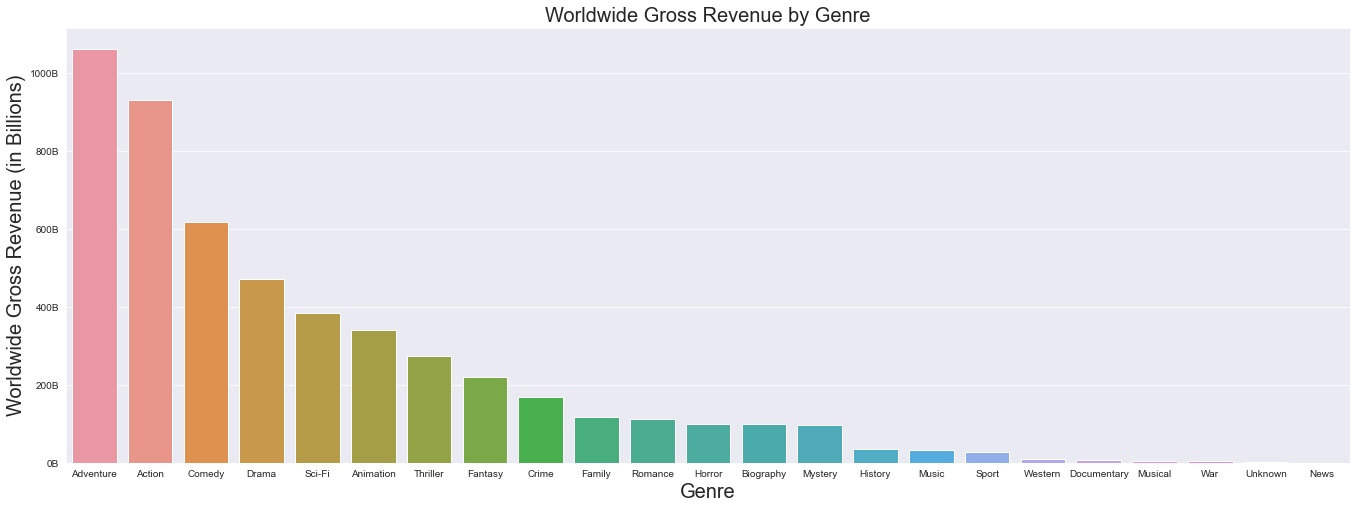

In [98]:
ylabels = ['0B', '200B', '400B', '600B', '800B', '1000B']

sns.set_style('darkgrid')
plt.figure(figsize = (23,8))
plt.ticklabel_format(style='plain')
g = sns.barplot(x = 'genre', 
            y =  'worldwide_gross_revenue', 
            data = axis_rev, 
            order = axis_rev.sort_values('worldwide_gross_revenue', ascending = False).genre)

#set labels
g.set_yticklabels(labels = ylabels)
plt.xlabel('Genre', size = 20)
plt.ylabel('Worldwide Gross Revenue (in Billions)', size = 20)
plt.title('Worldwide Gross Revenue by Genre', size = 20)
plt.show()